# Introduction
Decision trees are a powerful, and popular supervised machine learning technique used for both classification, and regression tasks. They are widely used for interpretability, ease of implementation, and ability to handle various data types.

A decision tree resembeles a flowchart like structure with 3 main components,
1. Internal nodes: These represent questions, or test applied to a specific feature of the data.
2. Branches: These represent the outcome of the test at an internal node, leading to different parts of the tree.
3. Leaf nodes: These represent the final decision or prediction made by the tree.

Advantages of decision trees,
- Interpretability: Decision trees are easy to understand and interpret. The branches can easily be followed to understand the logic behind the predictions.
- No feature scaling: Decision trees can handle both numerical and categorical features without the need for explicit feature scaling, which can be a challenge in other algorithms.
- Robust to outliers: Decision trees are relatively robust to outliers in the data compared to some other models.
- Can handle missing values: Techniques like splitting based on the presence or absence of a value can be used to handle missing data.

Disadvantages of decision trees,
- Prone to overfitting: If allowed to grow too deep, decision trees can become overly complex and start fitting the training data too closely, leading to poor performance on unseen data (overfitting). Techniques like pruning or setting a maximum depth can help mitigate this.
- High variance: Decision trees can be sensitive to small changes in the data, leading to potentially high variance in the model's predictions. Techniques like bagging or random forests can help reduce variance.
- Feature importance: While interpretable, understanding the exact contribution of each feature to the final decision can be challenging in complex trees.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
pd.set_option("display.max_columns", None)
sns.set_theme(style = "whitegrid")
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (20, 5)

# Decision Tree Algorithm
1. Start with the entire dataset at the root node.
2. Choose the best splitting feature: This involves finding the feature that best separates the data into distinct groups based on the target variable (classification), or prediction of continuous value (regression). Techniques like information gain (IG), or gini impurity (GI) are used to evaluate the goodness of the split.
3. Split the data based on the chosen feature: Create branches for each possible outcome of the test at the internal node.
4. Recursively repeat step 2, and 3 for each branch until a stopping criteria is met. This criteria could be, reaching a certain level of purity (meaning all data points in a leaf node belong to the same class in classification or have similar target values in regression), or reaching the maximum depth defined for the tree, or having no more informative features to split on.

# Code Implementation of Decision Tree for Classification

In [3]:
df1 = pd.read_csv("employee_attrition_dataset/train.csv")
df2 = pd.read_csv("employee_attrition_dataset/test.csv")
df = pd.concat([df1, df2])
df.head()

Employee ID  Age  Gender  Years at Company    Job Role  Monthly Income  \
0         8410   31    Male                19   Education            5390   
1        64756   59  Female                 4       Media            5534   
2        30257   24  Female                10  Healthcare            8159   
3        65791   36  Female                 7   Education            3989   
4        65026   56    Male                41   Education            4821   

  Work-Life Balance Job Satisfaction Performance Rating  Number of Promotions  \
0         Excellent           Medium            Average                     2   
1              Poor             High                Low                     3   
2              Good             High                Low                     0   
3              Good             High               High                     1   
4              Fair        Very High            Average                     0   

  Overtime  Distance from Home    Education Level Marital Status  \
0       No                  22   Associate Degree        Married   
1       No                  21    Master’s Degree       Divorced   
2       No                  11  Bachelor’s Degree        Married   
3       No                  27        High School         Single   
4      Yes                  71        High School       Divorced   

   Number of Dependents Job Level Company Size  Company Tenure Remote Work  \
0                     0       Mid       Medium              89          No   
1                     3       Mid       Medium              21          No   
2                     3       Mid       Medium              74          No   
3                     2       Mid        Small              50         Yes   
4                     0    Senior       Medium              68          No   

  Leadership Opportunities Innovation Opportunities Company Reputation  \
0                       No                       No          Excellent   
1                       No                       No               Fair   
2                       No                       No               Poor   
3                       No                       No               Good   
4                       No                       No               Fair   

  Employee Recognition Attrition  
0               Medium    Stayed  
1                  Low    Stayed  
2                  Low    Stayed  
3               Medium    Stayed  
4               Medium    Stayed

In [4]:
# missing values
df.isna().sum()

Employee ID                 0
Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           0
Job Satisfaction            0
Performance Rating          0
Number of Promotions        0
Overtime                    0
Distance from Home          0
Education Level             0
Marital Status              0
Number of Dependents        0
Job Level                   0
Company Size                0
Company Tenure              0
Remote Work                 0
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Employee Recognition        0
Attrition                   0
dtype: int64

In [5]:
# duplicated
df.duplicated().sum()

np.int64(0)

In [6]:
df.shape

(74498, 24)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74498 entries, 0 to 14899
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Employee ID               74498 non-null  int64 
 1   Age                       74498 non-null  int64 
 2   Gender                    74498 non-null  object
 3   Years at Company          74498 non-null  int64 
 4   Job Role                  74498 non-null  object
 5   Monthly Income            74498 non-null  int64 
 6   Work-Life Balance         74498 non-null  object
 7   Job Satisfaction          74498 non-null  object
 8   Performance Rating        74498 non-null  object
 9   Number of Promotions      74498 non-null  int64 
 10  Overtime                  74498 non-null  object
 11  Distance from Home        74498 non-null  int64 
 12  Education Level           74498 non-null  object
 13  Marital Status            74498 non-null  object
 14  Number of Dependents      7

In [8]:
# dropping "Employee ID" column
df.drop(columns = ["Employee ID"], inplace = True)
df.head()

Age  Gender  Years at Company    Job Role  Monthly Income  \
0   31    Male                19   Education            5390   
1   59  Female                 4       Media            5534   
2   24  Female                10  Healthcare            8159   
3   36  Female                 7   Education            3989   
4   56    Male                41   Education            4821   

  Work-Life Balance Job Satisfaction Performance Rating  Number of Promotions  \
0         Excellent           Medium            Average                     2   
1              Poor             High                Low                     3   
2              Good             High                Low                     0   
3              Good             High               High                     1   
4              Fair        Very High            Average                     0   

  Overtime  Distance from Home    Education Level Marital Status  \
0       No                  22   Associate Degree        Married   
1       No                  21    Master’s Degree       Divorced   
2       No                  11  Bachelor’s Degree        Married   
3       No                  27        High School         Single   
4      Yes                  71        High School       Divorced   

   Number of Dependents Job Level Company Size  Company Tenure Remote Work  \
0                     0       Mid       Medium              89          No   
1                     3       Mid       Medium              21          No   
2                     3       Mid       Medium              74          No   
3                     2       Mid        Small              50         Yes   
4                     0    Senior       Medium              68          No   

  Leadership Opportunities Innovation Opportunities Company Reputation  \
0                       No                       No          Excellent   
1                       No                       No               Fair   
2                       No                       No               Poor   
3                       No                       No               Good   
4                       No                       No               Fair   

  Employee Recognition Attrition  
0               Medium    Stayed  
1                  Low    Stayed  
2                  Low    Stayed  
3               Medium    Stayed  
4               Medium    Stayed

In [9]:
# statistical summary of numerical columns
df.describe()

Age  Years at Company  Monthly Income  Number of Promotions  \
count  74498.000000      74498.000000    74498.000000          74498.000000   
mean      38.529746         15.721603     7299.379514              0.832935   
std       12.083456         11.223744     2152.508566              0.995289   
min       18.000000          1.000000     1226.000000              0.000000   
25%       28.000000          7.000000     5652.000000              0.000000   
50%       39.000000         13.000000     7348.000000              1.000000   
75%       49.000000         23.000000     8876.000000              2.000000   
max       59.000000         51.000000    16149.000000              4.000000   

       Distance from Home  Number of Dependents  Company Tenure  
count        74498.000000          74498.000000    74498.000000  
mean            49.991584              1.650326       55.727456  
std             28.513611              1.553633       25.399349  
min              1.000000              0.000000        2.000000  
25%             25.000000              0.000000       36.000000  
50%             50.000000              1.000000       56.000000  
75%             75.000000              3.000000       76.000000  
max             99.000000              6.000000      128.000000

In [10]:
# correlation matrix
df.corr(numeric_only = True)

Age  Years at Company  Monthly Income  \
Age                   1.000000          0.537318       -0.001750   
Years at Company      0.537318          1.000000       -0.005971   
Monthly Income       -0.001750         -0.005971        1.000000   
Number of Promotions  0.000672          0.000939        0.005669   
Distance from Home   -0.004586         -0.004835       -0.001910   
Number of Dependents  0.003689          0.004387        0.001507   
Company Tenure        0.236337          0.442580       -0.006911   

                      Number of Promotions  Distance from Home  \
Age                               0.000672           -0.004586   
Years at Company                  0.000939           -0.004835   
Monthly Income                    0.005669           -0.001910   
Number of Promotions              1.000000           -0.006833   
Distance from Home               -0.006833            1.000000   
Number of Dependents             -0.001459           -0.000954   
Company Tenure                    0.005150           -0.005735   

                      Number of Dependents  Company Tenure  
Age                               0.003689        0.236337  
Years at Company                  0.004387        0.442580  
Monthly Income                    0.001507       -0.006911  
Number of Promotions             -0.001459        0.005150  
Distance from Home               -0.000954       -0.005735  
Number of Dependents              1.000000        0.000422  
Company Tenure                    0.000422        1.000000

In [11]:
# label encoding the binary columns
binary_columns = [i for i in df.columns if df[i].dtype not in [int, float] and df[i].nunique() == 2]
binary_columns

['Gender',
 'Overtime',
 'Remote Work',
 'Leadership Opportunities',
 'Innovation Opportunities',
 'Attrition']

In [12]:
from sklearn.preprocessing import LabelEncoder

def label_encoder(dataframe, column):
    labelencoder = LabelEncoder()
    dataframe[column] = labelencoder.fit_transform(dataframe[column])
    return dataframe

In [13]:
for i in binary_columns:
    df = label_encoder(df, i)

df.head()

Age  Gender  Years at Company    Job Role  Monthly Income  \
0   31       1                19   Education            5390   
1   59       0                 4       Media            5534   
2   24       0                10  Healthcare            8159   
3   36       0                 7   Education            3989   
4   56       1                41   Education            4821   

  Work-Life Balance Job Satisfaction Performance Rating  Number of Promotions  \
0         Excellent           Medium            Average                     2   
1              Poor             High                Low                     3   
2              Good             High                Low                     0   
3              Good             High               High                     1   
4              Fair        Very High            Average                     0   

   Overtime  Distance from Home    Education Level Marital Status  \
0         0                  22   Associate Degree        Married   
1         0                  21    Master’s Degree       Divorced   
2         0                  11  Bachelor’s Degree        Married   
3         0                  27        High School         Single   
4         1                  71        High School       Divorced   

   Number of Dependents Job Level Company Size  Company Tenure  Remote Work  \
0                     0       Mid       Medium              89            0   
1                     3       Mid       Medium              21            0   
2                     3       Mid       Medium              74            0   
3                     2       Mid        Small              50            1   
4                     0    Senior       Medium              68            0   

   Leadership Opportunities  Innovation Opportunities Company Reputation  \
0                         0                         0          Excellent   
1                         0                         0               Fair   
2                         0                         0               Poor   
3                         0                         0               Good   
4                         0                         0               Fair   

  Employee Recognition  Attrition  
0               Medium          1  
1                  Low          1  
2                  Low          1  
3               Medium          1  
4               Medium          1

In [14]:
# one-hot encoding the categorical columns
ohe_columns = [i for i in df.columns if 10 >= df[i].nunique() > 2]
ohe_columns

['Job Role',
 'Work-Life Balance',
 'Job Satisfaction',
 'Performance Rating',
 'Number of Promotions',
 'Education Level',
 'Marital Status',
 'Number of Dependents',
 'Job Level',
 'Company Size',
 'Company Reputation',
 'Employee Recognition']

In [15]:
def one_hot_encoder(dataframe, categorical_columns, drop_first = True):
    dataframe = pd.get_dummies(dataframe, columns = categorical_columns, drop_first=drop_first)
    return dataframe

In [16]:
df = one_hot_encoder(df, ohe_columns, drop_first=True)
df.head()

Age  Gender  Years at Company  Monthly Income  Overtime  \
0   31       1                19            5390         0   
1   59       0                 4            5534         0   
2   24       0                10            8159         0   
3   36       0                 7            3989         0   
4   56       1                41            4821         1   

   Distance from Home  Company Tenure  Remote Work  Leadership Opportunities  \
0                  22              89            0                         0   
1                  21              21            0                         0   
2                  11              74            0                         0   
3                  27              50            1                         0   
4                  71              68            0                         0   

   Innovation Opportunities  Attrition  Job Role_Finance  Job Role_Healthcare  \
0                         0          1             False                False   
1                         0          1             False                False   
2                         0          1             False                 True   
3                         0          1             False                False   
4                         0          1             False                False   

   Job Role_Media  Job Role_Technology  Work-Life Balance_Fair  \
0           False                False                   False   
1            True                False                   False   
2           False                False                   False   
3           False                False                   False   
4           False                False                    True   

   Work-Life Balance_Good  Work-Life Balance_Poor  Job Satisfaction_Low  \
0                   False                   False                 False   
1                   False                    True                 False   
2                    True                   False                 False   
3                    True                   False                 False   
4                   False                   False                 False   

   Job Satisfaction_Medium  Job Satisfaction_Very High  \
0                     True                       False   
1                    False                       False   
2                    False                       False   
3                    False                       False   
4                    False                        True   

   Performance Rating_Below Average  Performance Rating_High  \
0                             False                    False   
1                             False                    False   
2                             False                    False   
3                             False                     True   
4                             False                    False   

   Performance Rating_Low  Number of Promotions_1  Number of Promotions_2  \
0                   False                   False                    True   
1                    True                   False                   False   
2                    True                   False                   False   
3                   False                    True                   False   
4                   False                   False                   False   

   Number of Promotions_3  Number of Promotions_4  \
0                   False                   False   
1                    True                   False   
2                   False                   False   
3                   False                   False   
4                   False                   False   

   Education Level_Bachelor’s Degree  Education Level_High School  \
0                              False                        False   
1                              False                        False   
2                               True                        False   
3                     

In [17]:
df.shape

(74498, 50)

In [18]:
# splitting the train and test dataset
from sklearn.model_selection import train_test_split

x = df.drop(columns = ["Attrition"])
y = df["Attrition"]

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((59598, 49), (14900, 49), (59598,), (14900,))

In [20]:
# scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [21]:
# training the decision tree classifier
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion = "entropy")
model.fit(x_train_scaled, y_train)

DecisionTreeClassifier(criterion='entropy')

In [22]:
# predicting
y_pred = model.predict(x_test_scaled)
y_pred

array([1, 0, 1, ..., 1, 1, 1])

In [23]:
model.score(x_train_scaled, y_train)

1.0

In [24]:
model.score(x_test_scaled, y_test)

0.6766442953020134

In [25]:
model.feature_importances_

array([0.0773838 , 0.01389451, 0.07918844, 0.09582799, 0.01292728,
       0.09870886, 0.09066077, 0.04373973, 0.00413105, 0.00984342,
       0.00716013, 0.0084272 , 0.00770632, 0.00629937, 0.01807366,
       0.0088676 , 0.01896955, 0.00793209, 0.00920166, 0.01130228,
       0.00966895, 0.00882552, 0.00586223, 0.01082615, 0.0087448 ,
       0.01317668, 0.00375236, 0.01070083, 0.00870627, 0.01058319,
       0.01238019, 0.0074855 , 0.05861128, 0.00872964, 0.00642064,
       0.00918693, 0.01093694, 0.00673465, 0.00163529, 0.02085535,
       0.06108182, 0.01063061, 0.00890577, 0.00755744, 0.01112928,
       0.01044056, 0.01105176, 0.01044442, 0.00468922])

In [26]:
model.get_n_leaves()

np.int64(10361)

# Visualizing Decision Trees
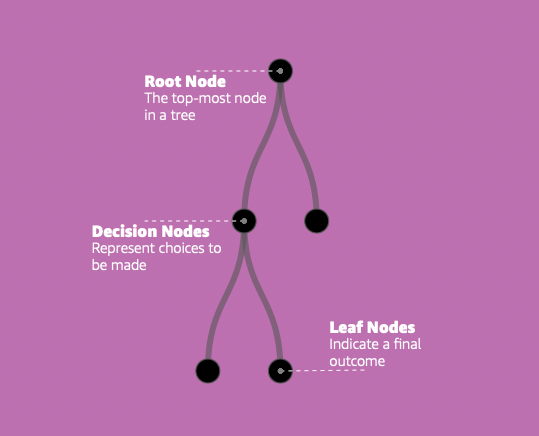

- The first node is called as root node.
- The nodes that are not split further are class as leaf nodes.
- The nodes in between the root node, and the leaf nodes are called as internal nodes, or decision nodes.
- The decision boundaries in a decision tree are axis parallel. Meaning, a node cannot be created that splits the data linearly, or polynomially, or logistically.
- Pure node, or homogenous nodes occur when there is only one class present as a result of a lot of splitting.

[Text(0.7206804100155368, 0.9878048780487805, 'x[32] <= 0.5\nentropy = 0.998\nsamples = 59598\nvalue = [28274, 31324]'),
 Text(0.5360872519229066, 0.9634146341463414, 'x[40] <= 0.5\nentropy = 0.952\nsamples = 38833\nvalue = [14411.0, 24422.0]'),
 Text(0.6283838309692218, 0.975609756097561, 'True  '),
 Text(0.4254213929866487, 0.9390243902439024, 'x[7] <= 0.5\nentropy = 0.988\nsamples = 30900\nvalue = [13487, 17413]'),
 Text(0.30580660095258666, 0.9146341463414634, 'x[39] <= 0.5\nentropy = 1.0\nsamples = 25060\nvalue = [12382, 12678]'),
 Text(0.18284247215665392, 0.8902439024390244, 'x[14] <= 0.5\nentropy = 0.976\nsamples = 12548\nvalue = [7405, 5143]'),
 Text(0.14016056574117325, 0.8658536585365854, 'x[16] <= 0.5\nentropy = 0.995\nsamples = 8700\nvalue = [4725, 3975]'),
 Text(0.11958077741427306, 0.8414634146341463, 'x[25] <= 0.5\nentropy = 1.0\nsamples = 6915\nvalue = [3409.0, 3506.0]'),
 Text(0.1029707880400277, 0.8170731707317073, 'x[30] <= 0.5\nentropy = 1.0\nsamples = 6567\nvalue 

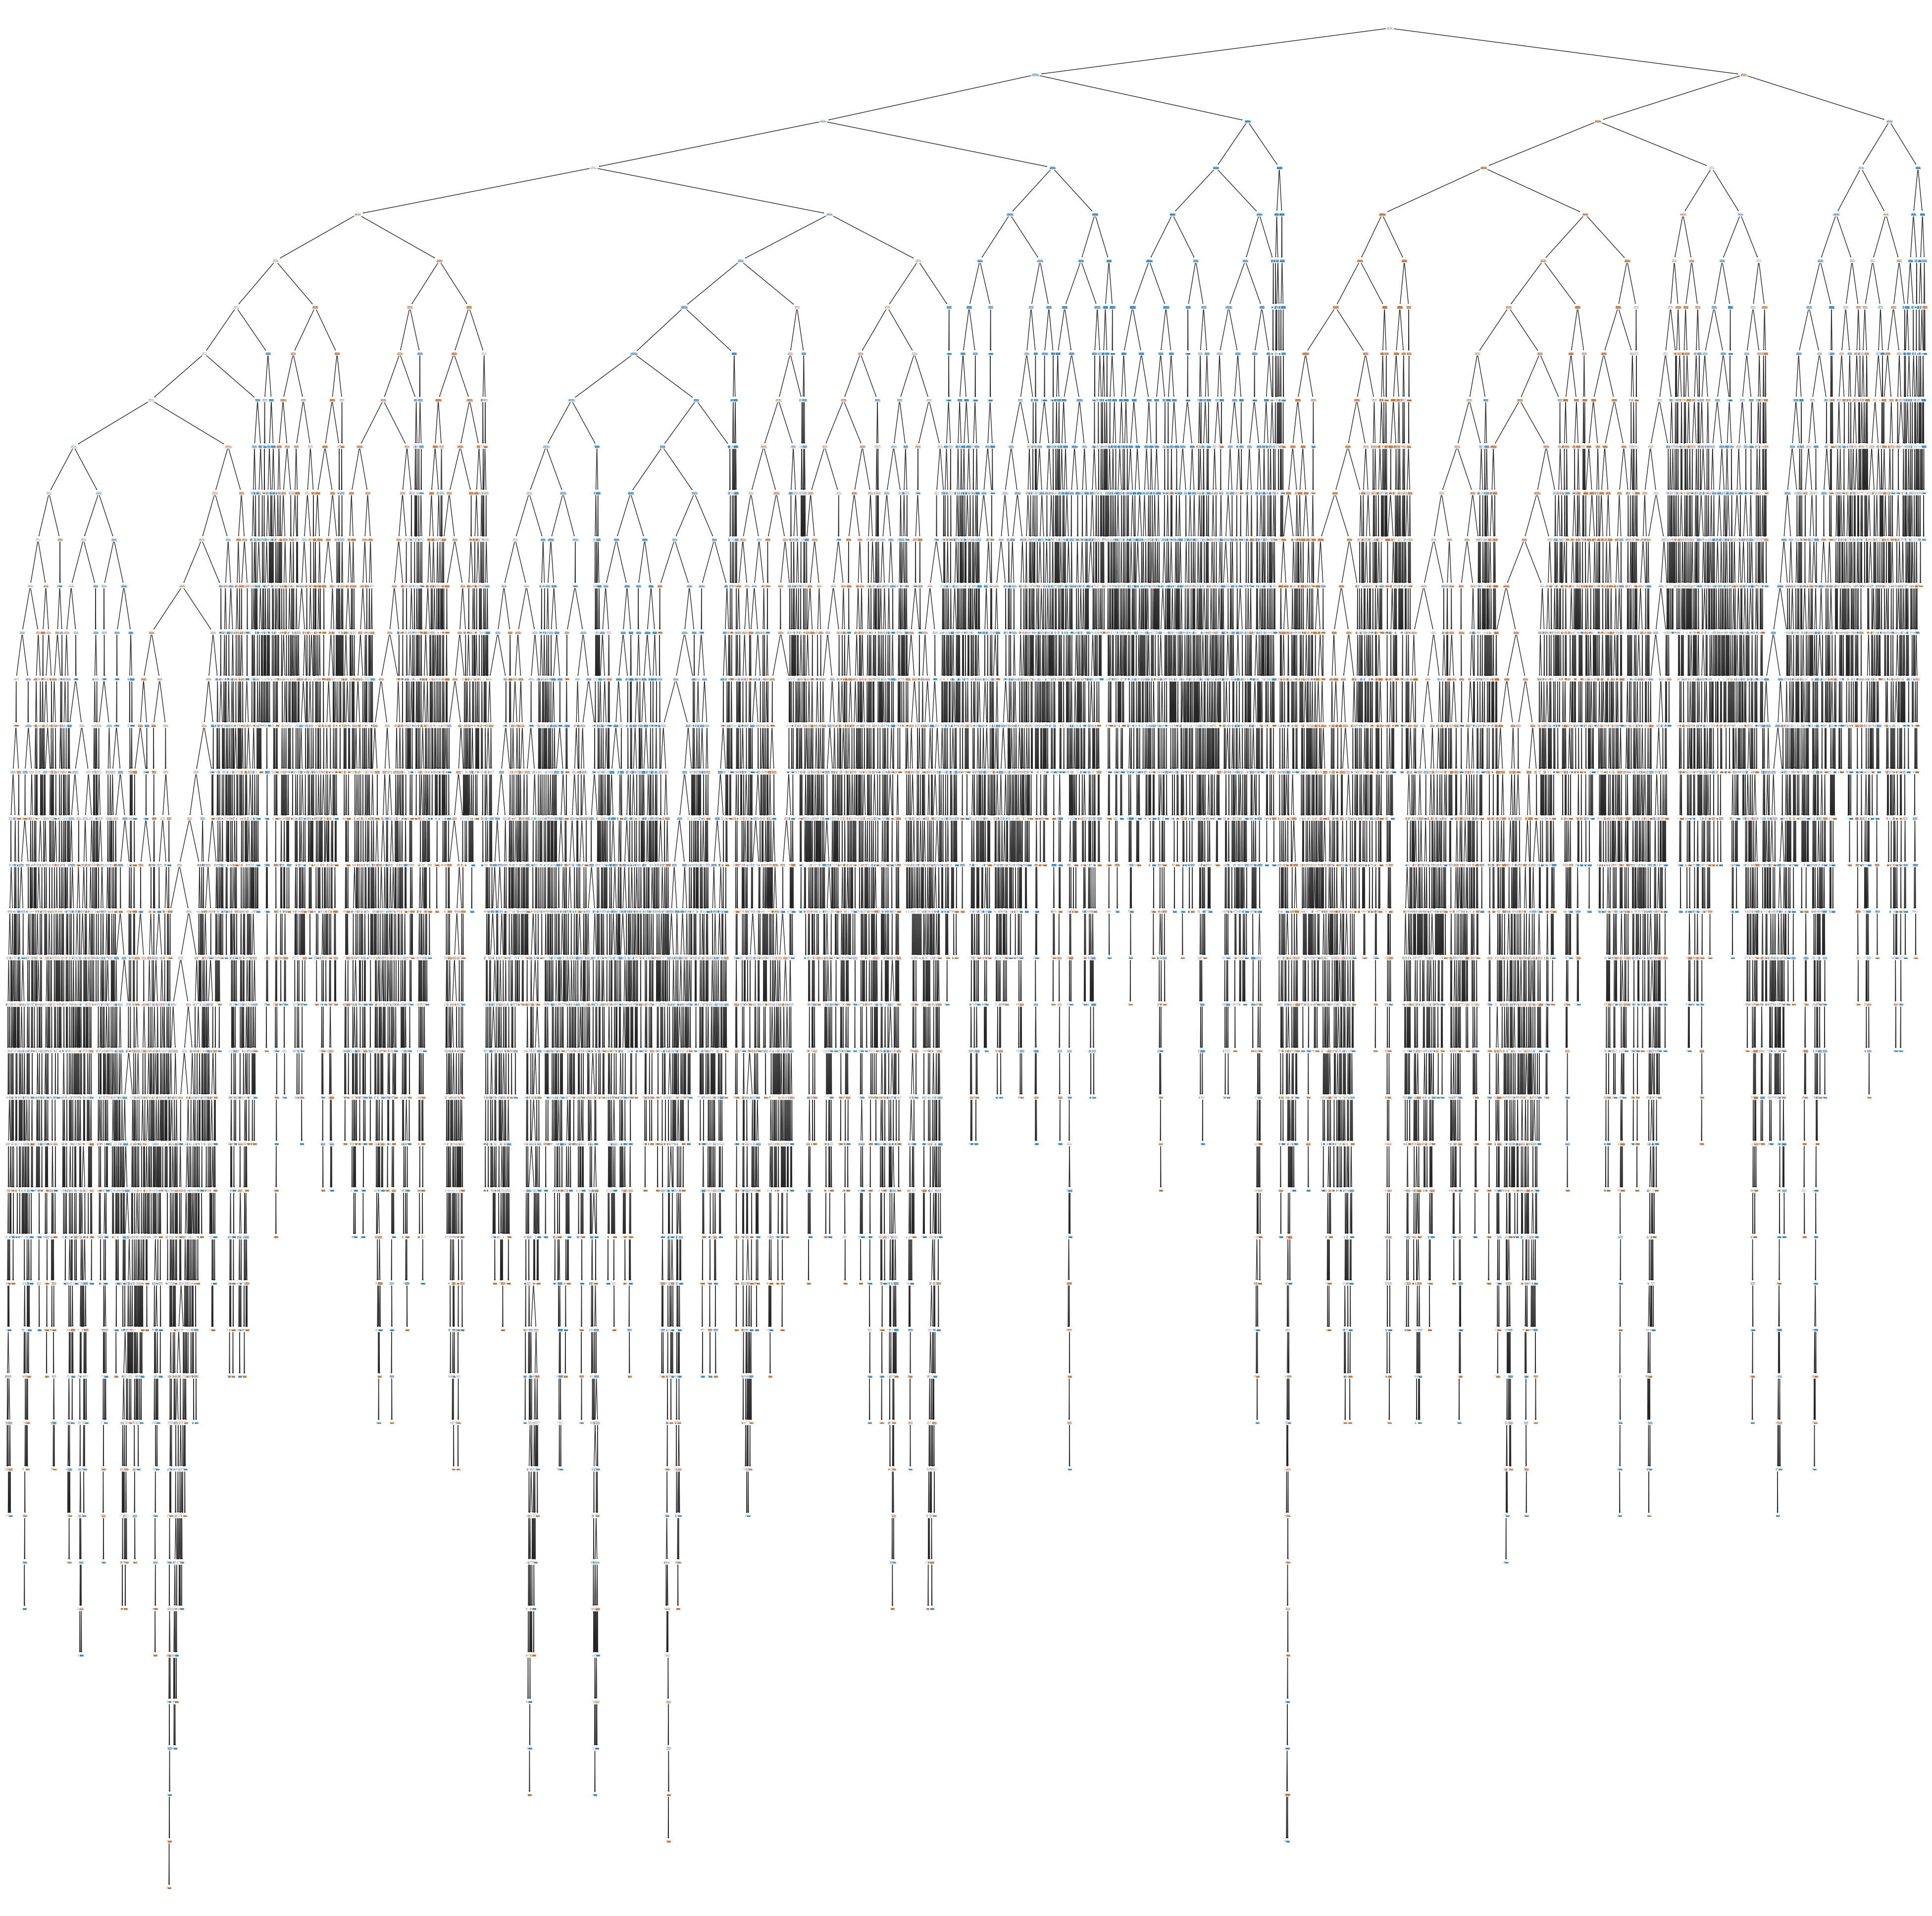

In [27]:
from sklearn.tree import plot_tree
plt.figure(figsize = (50, 50))
plot_tree(model, filled = True)

[Text(0.5, 0.9, 'x[32] <= 0.5\nentropy = 0.998\nsamples = 59598\nvalue = [28274, 31324]'),
 Text(0.25, 0.7, 'x[40] <= 0.5\nentropy = 0.952\nsamples = 38833\nvalue = [14411.0, 24422.0]'),
 Text(0.375, 0.8, 'True  '),
 Text(0.125, 0.5, 'x[7] <= 0.5\nentropy = 0.988\nsamples = 30900\nvalue = [13487, 17413]'),
 Text(0.0625, 0.3, 'x[39] <= 0.5\nentropy = 1.0\nsamples = 25060\nvalue = [12382, 12678]'),
 Text(0.03125, 0.1, '\n  (...)  \n'),
 Text(0.09375, 0.1, '\n  (...)  \n'),
 Text(0.1875, 0.3, 'x[39] <= 0.5\nentropy = 0.7\nsamples = 5840\nvalue = [1105, 4735]'),
 Text(0.15625, 0.1, '\n  (...)  \n'),
 Text(0.21875, 0.1, '\n  (...)  \n'),
 Text(0.375, 0.5, 'x[7] <= 0.5\nentropy = 0.519\nsamples = 7933\nvalue = [924, 7009]'),
 Text(0.3125, 0.3, 'x[14] <= 0.5\nentropy = 0.585\nsamples = 6437\nvalue = [904, 5533]'),
 Text(0.28125, 0.1, '\n  (...)  \n'),
 Text(0.34375, 0.1, '\n  (...)  \n'),
 Text(0.4375, 0.3, 'x[0] <= 0.159\nentropy = 0.102\nsamples = 1496\nvalue = [20, 1476]'),
 Text(0.40625, 

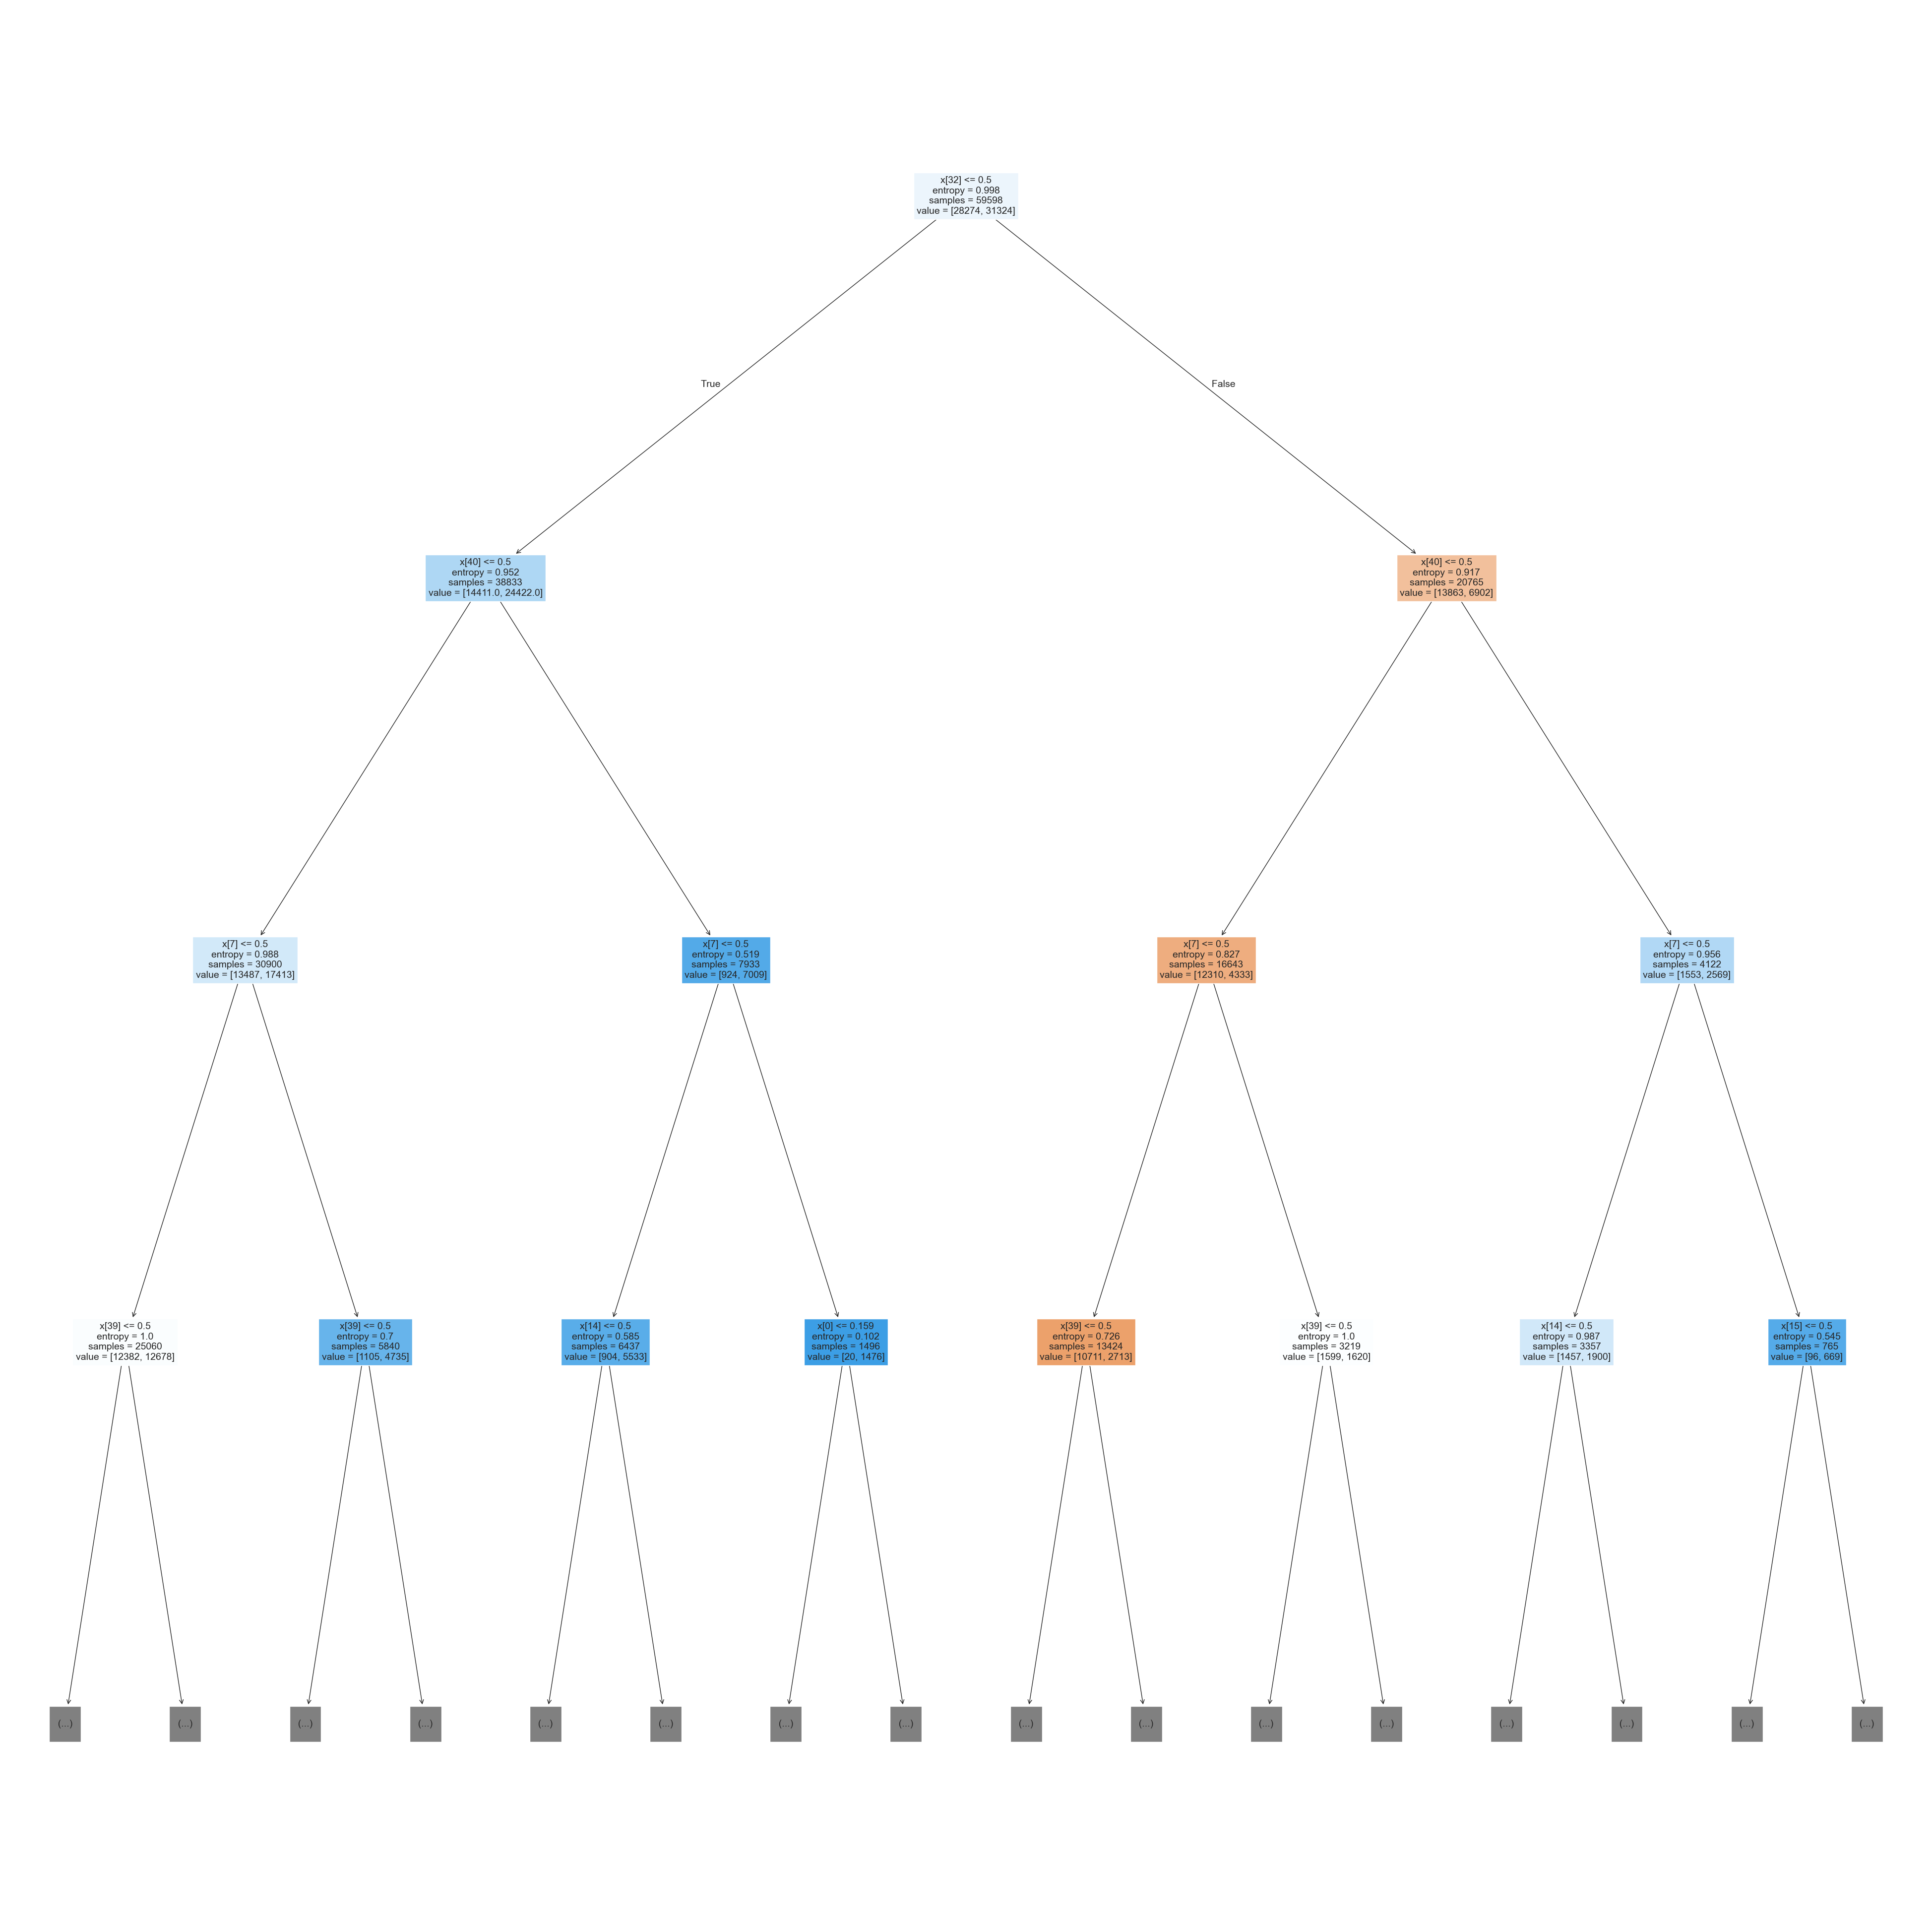

In [28]:
plt.figure(figsize = (50, 50))
plot_tree(model, filled = True, max_depth = 3)

# A Better Way to Visualize the Full Tree

In [31]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot

# create a list of all the columns
features = list(x_train.columns)
# ensure that the target variable "Attrition" is not there in the features
print(features)

['Age', 'Gender', 'Years at Company', 'Monthly Income', 'Overtime', 'Distance from Home', 'Company Tenure', 'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities', 'Job Role_Finance', 'Job Role_Healthcare', 'Job Role_Media', 'Job Role_Technology', 'Work-Life Balance_Fair', 'Work-Life Balance_Good', 'Work-Life Balance_Poor', 'Job Satisfaction_Low', 'Job Satisfaction_Medium', 'Job Satisfaction_Very High', 'Performance Rating_Below Average', 'Performance Rating_High', 'Performance Rating_Low', 'Number of Promotions_1', 'Number of Promotions_2', 'Number of Promotions_3', 'Number of Promotions_4', 'Education Level_Bachelor’s Degree', 'Education Level_High School', 'Education Level_Master’s Degree', 'Education Level_PhD', 'Marital Status_Married', 'Marital Status_Single', 'Number of Dependents_1', 'Number of Dependents_2', 'Number of Dependents_3', 'Number of Dependents_4', 'Number of Dependents_5', 'Number of Dependents_6', 'Job Level_Mid', 'Job Level_Senior', 'Company Size_M

In [33]:
dot_data = StringIO()
export_graphviz(model, out_file = dot_data, feature_names = features, filled = True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

FileNotFoundError: [Errno 2] "dot" not found in path.

# How to decide what feature to split on, and what threshold to split on?
- Say that there are 200 data points, 100 positive and 100 negative. Also, say that there are d features.
- Say that 2 features j and k are selected out of the d features. Also say that 2 thresholds $\tau_j$ and $\tau_k$ are chosen.
- Consider case 1, where the feature j, and the threshold $\tau_j$ is splitting the 200 data points into, 10 positives and 90 negatives if the decision was yes, and 90 positives and 10 negatives if the decision was no.
- Consider case 2, where the feature k, and the threshold $\tau_k$ is splitting the 200 data points into, 60 positives and 40 negatives if the decision was yes, and 40 positives and 60 negatives if the decision was no.
- The better combination of feature, and threshold that should be selected is case 1. Why? Because, this choice is resulting in a purer node, or better segregation.

# How to measure purity (Entropy)?
There is no direct way of measutring purity. But there is a way to measure impurity using the concept of entropy. Entropy essentially measures the randomness, or uncertainity associated with classifying a data point at a node.

### Calculating entropy
1. The number of classes, k, present in the dataset are considered.
2. For each class i, the probability $P(class_i)$ is calculated by dividing the number of data points belonging to that class by the total number of data points in the node n.
3. The entropy H(X) is calculated using the formula, $H(class_k) = - \sum_{i = 1}^{k}P(class_k)*\log_2(P(class_k))$. The logarithm is typically taken in base 2 (logarithm with base 2), resulting in units of bits.

### Interpreting entropy
- A higher entropy (closer to 1) indicates a more impure node. The probabilities of different classes are closer, making it harder to predict the class label for a new data point.
- A lower entropy (closer to 0) indicates a purer node. The data points in the node predominantly belong to one class, leading to higher confidence in predicting the class label.

# How to pick the best decision when there is choice between two? Choosing the best split: Information Gain (IG)
The drop from impurity at root level and the impurity after the split is called as information gain. It preferred to have low impurity, and high information gain (IG).

When presented with multiple potential splits (e.g., gender or age), decision trees use information gain to determine the split that leads to the most significant reduction in impurity.

Here's the process,
1. Calculate entropy for child nodes: After splitting the root node (based on feature-threshold combination), calculate the entropy for each child node. This reflects the impurity within each child node.
2. Weighted average impurity: Since each child node has a different number of data points ($n_1$ and $n_2$), a simple average of their entropies wouldn't be ideal. Weighted average is used based on the proportion of data points in each child node relative to the total number of data points (n) at the parent node. $\text{Impurity of this decision} = (\frac{n1}{n} * Entropy(C1))+(\frac{n2}{n} * Entropy(C2))$. This weighted average represents the overall impurity resulting from the chosen split.
3. Information gain calculation: It is intended to see how much the split reduces the uncertainity (entropy) compared to the parent node. $\text{Information Gain} = Entropy(Parent) - Entropy(Child)$, $\text{Information Gain} = H(Parent) - H(Child)$.
4. Choosing the best split: The information gain for each potential split is evaluate (considering different features and thresholds). The split with the highest information gain is chosen as it leads to the most significant reduction in entropy, resulting in purer child nodes. Ideally, information gain should be positive, indicating a decrease in entropy after the split. Negative information gain suggests the split doesn't improve purity and might be discarded.
5. Iterating through features: The steps 1 to 4 are repeated for all the features ($f_1$ to $f_d$) and their possible thresholds. The feature-threshold combination with the highest information gain is chosen for splitting the node.